In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#from pandas import Series

In [3]:
dataprice = pd.read_csv('C:/Users/User/Desktop/DATA3001/dispatchpriceUPDATED/dispatchprice_fy2009-2019.csv')

C:\Users\User\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (54,55) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
dataprice = dataprice[['SETTLEMENTDATE', 'REGIONID', 'INTERVENTION', 'RRP']]

In [5]:
datademand = pd.read_csv('C:/Users/User/Desktop/DATA3001/dispatchregionsumUPDATED/dispatchregionsum_rrponly_fy2009-2019/dispatchregionsum_rrponly_fy2009-2019.csv')

In [6]:
datademand = datademand[['SETTLEMENTDATE', 'REGIONID', 'INTERVENTION', 'TOTALDEMAND']]

In [8]:
#Merging two tables by SETTLEMENTDATE and REGIONID
mergedData = dataprice.merge(datademand, how = 'inner', left_on=["SETTLEMENTDATE", "REGIONID"], right_on=["SETTLEMENTDATE", "REGIONID"])

In [9]:
# How many instances where there with INTERVENTION = 1?

In [10]:
mergedData = mergedData[mergedData['INTERVENTION_x'] == 0]
mergedData = mergedData[mergedData['INTERVENTION_y'] == 0]
mergedData = mergedData.drop(['INTERVENTION_x'], axis=1)
mergedData = mergedData.drop(['INTERVENTION_y'], axis=1)

mergedData[['DATE','TIME']] = mergedData.SETTLEMENTDATE.str.split(" ",expand=True)

In [11]:
#mergedData is something different now. Don't run this cell.
mergedData_yearlyAnalysis = mergedData

----------------------------------------------------------------------------------

#### One of our problems is that we have two much information, we have 288 readings everyday from each of the regions. Performing analysis over the entire year or the entirety of 11 years becomes substantially hard due to the volatility of the data and observing correlation plots seem mere impossible. Hence, when trying to extrapolate yearly trends, we decided to use the average of every day – providing us 365-366 observations every year for each region.

#### For later use in analyzing yearly stats.

In [12]:
mergedData_yearlyAnalysis_u1 = mergedData_yearlyAnalysis[['DATE', 'REGIONID', 'RRP']]
mergedData_yearlyAnalysis_u1 = mergedData_yearlyAnalysis_u1['RRP'].groupby([mergedData_yearlyAnalysis_u1['DATE'], mergedData_yearlyAnalysis_u1['REGIONID']]).mean().reset_index()

In [13]:
mergedData[['DATE','TIME']] = mergedData.SETTLEMENTDATE.str.split(" ",expand=True)
mergedData_yearlyAnalysis_u1['RRP'].groupby([mergedData_yearlyAnalysis_u1['DATE'], mergedData_yearlyAnalysis_u1['REGIONID']]).mean().reset_index()

,DATE,REGIONID,RRP
0,2008-07-01,NSW1,26.704152
1,2008-07-01,QLD1,24.464545
2,2008-07-01,SA1,29.381576
3,2008-07-01,SNOWY1,28.602650
4,2008-07-01,TAS1,16.169344
...,...,...,...
20086,2019-07-01,NSW1,58.020910
20087,2019-07-01,QLD1,56.317250
20088,2019-07-01,SA1,60.757150
20089,2019-07-01,TAS1,55.640560


In [16]:
mergedData_yearlyAnalysis_u1 = pd.DataFrame(mergedData_yearlyAnalysis_u1)

In [17]:
mergedData_yearlyAnalysis_u1 = mergedData_yearlyAnalysis_u1.set_index('DATE')


In [22]:
mergedData

,REGIONID,RRP,TOTALDEMAND
SETTLEMENTDATE,,,
2008-07-01,NSW1,27.43703,9027.49
2008-07-01,QLD1,24.30000,5361.52
2008-07-01,SA1,29.77032,1614.93
2008-07-01,SNOWY1,28.60265,16.97
2008-07-01,TAS1,24.58964,1052.28
...,...,...,...
2019-07-01,NSW1,58.02091,8085.77
2019-07-01,QLD1,56.31725,5504.19
2019-07-01,SA1,60.75715,1508.18


--------------------------------------------------------------------------------

## If you want just the date variable, its at 

In [ ]:
mergedData = mergedData.drop(['DATE'], axis=1)
mergedData = mergedData.drop(['TIME'], axis=1)

mergedData['SETTLEMENTDATE']= pd.to_datetime(mergedData['SETTLEMENTDATE'])
mergedData = mergedData.set_index('SETTLEMENTDATE')

In [23]:
mergedDataNSWOLD = mergedDataOLD[mergedDataOLD['REGIONID'] == 'NSW1']
mergedDataNSWOLD = mergedDataNSWOLD.drop(['REGIONID'], axis=1)

mergedDataQLDOLD = mergedDataOLD[mergedDataOLD['REGIONID'] == 'QLD1']
mergedDataQLDOLD = mergedDataQLDOLD.drop(['REGIONID'], axis=1)

mergedDataTASOLD = mergedDataOLD[mergedDataOLD['REGIONID'] == 'TAS1']
mergedDataTASOLD = mergedDataTASOLD.drop(['REGIONID'], axis=1)

mergedDataSAOLD = mergedDataOLD[mergedDataOLD['REGIONID'] == 'SA1']
mergedDataSAOLD = mergedDataSAOLD.drop(['REGIONID'], axis=1)

In [24]:
mergedDataVICOLD = mergedData[mergedDataOLD['REGIONID'] == 'VIC1']
mergedDataVICOLD = mergedDataVICOLD.drop(['REGIONID'], axis=1)

<ipython-input-24-7eaba9b4441a>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mergedDataVICOLD = mergedData[mergedDataOLD['REGIONID'] == 'VIC1']


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [25]:
mergedDataNSW = mergedData[mergedData['REGIONID'] == 'NSW1']
mergedDataNSW = mergedDataNSW.drop(['REGIONID'], axis=1)

mergedDataQLD = mergedData[mergedData['REGIONID'] == 'QLD1']
mergedDataQLD = mergedDataQLD.drop(['REGIONID'], axis=1)

mergedDataTAS = mergedData[mergedData['REGIONID'] == 'TAS1']
mergedDataTAS = mergedDataTAS.drop(['REGIONID'], axis=1)

mergedDataVIC = mergedData[mergedData['REGIONID'] == 'VIC1']
mergedDataVIC = mergedDataVIC.drop(['REGIONID'], axis=1)

mergedDataSA = mergedData[mergedData['REGIONID'] == 'SA1']
mergedDataSA = mergedDataSA.drop(['REGIONID'], axis=1)

## 1.1 UNIVARIATE ANALYSIS - TIME SERIES (time and price)

In [26]:
mergedDataNSW_u1 = mergedDataNSW[['RRP']]
mergedDataVIC_u1 = mergedDataVIC[['RRP']]
mergedDataQLD_u1 = mergedDataQLD[['RRP']]
mergedDataSA_u1 = mergedDataSA[['RRP']]
mergedDataTAS_u1 = mergedDataTAS[['RRP']]

In [ ]:
mergedDataVIC_u1.to_csv(r'C:/Users/User/Desktop/DATA3001/JUPYTERDATAOUTPUT/mergedDataVIC_u1.csv', index = True)
#mergedDataQLD_u1.to_csv(r'C:/Users/User/Desktop/DATA3001/JUPYTERDATAOUTPUT/mergedDataQLD_u1.csv', index = True)
mergedDataSA_u1.to_csv(r'C:/Users/User/Desktop/DATA3001/JUPYTERDATAOUTPUTmergedDataSA_u1.csv', index = True)
mergedDataTAS_u1.to_csv(r'C:/Users/User/Desktop/DATA3001/JUPYTERDATAOUTPUTmergedDataTAS_u1.csv', index = True)

In [ ]:
mergedDataNSWOLD['RRP']

In [27]:
mergedDataNSW_u1_288 = mergedDataNSW_u1[:288]

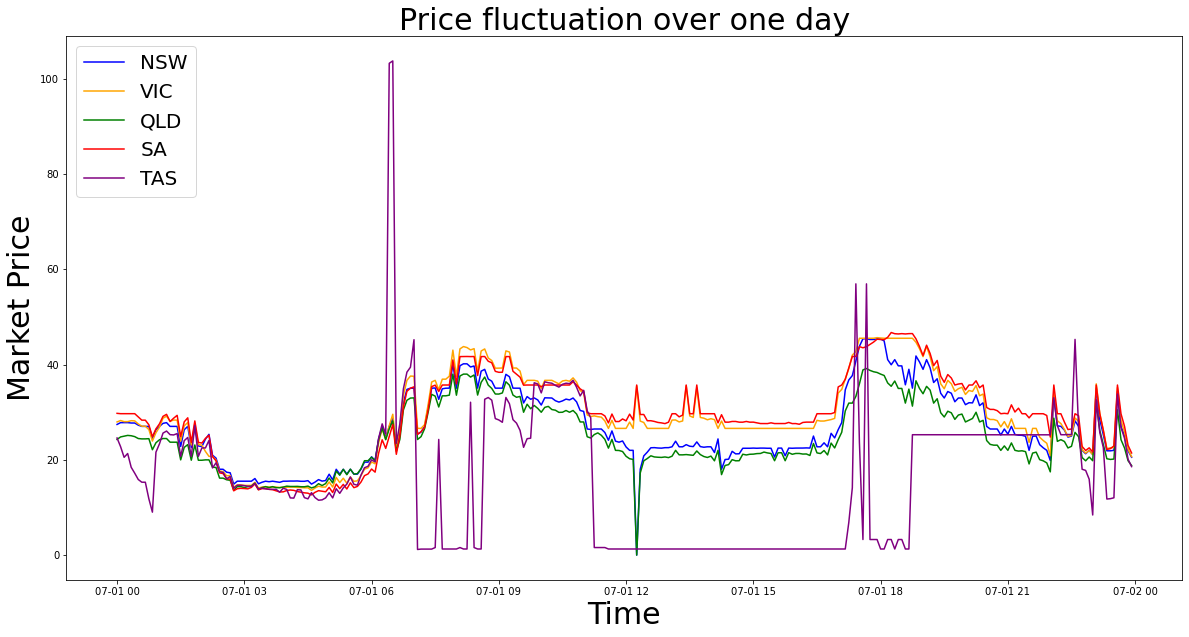

In [28]:
#Plotting the observation for the first day - just for peaking
plt.figure(figsize=(20,10))
plt.plot(mergedDataNSW_u1_288, color='blue', label='NSW')
plt.plot(mergedDataVIC_u1[:288], color='orange', label='VIC')
plt.plot(mergedDataQLD_u1[:288],color='green', label='QLD')
plt.plot(mergedDataSA_u1[:288], color='red', label='SA')
plt.plot(mergedDataTAS_u1[:288], color='purple', label='TAS')

plt.legend(loc='upper left',prop={"size":20})
plt.xlabel('Time', fontsize=30) 
plt.ylabel('Market Price', fontsize=30)
plt.title("Price fluctuation over one day", fontsize=30)
plt.savefig('C:/Users/User/Desktop/DATA3001/Graphs/price fluctuation.png')
plt.show()

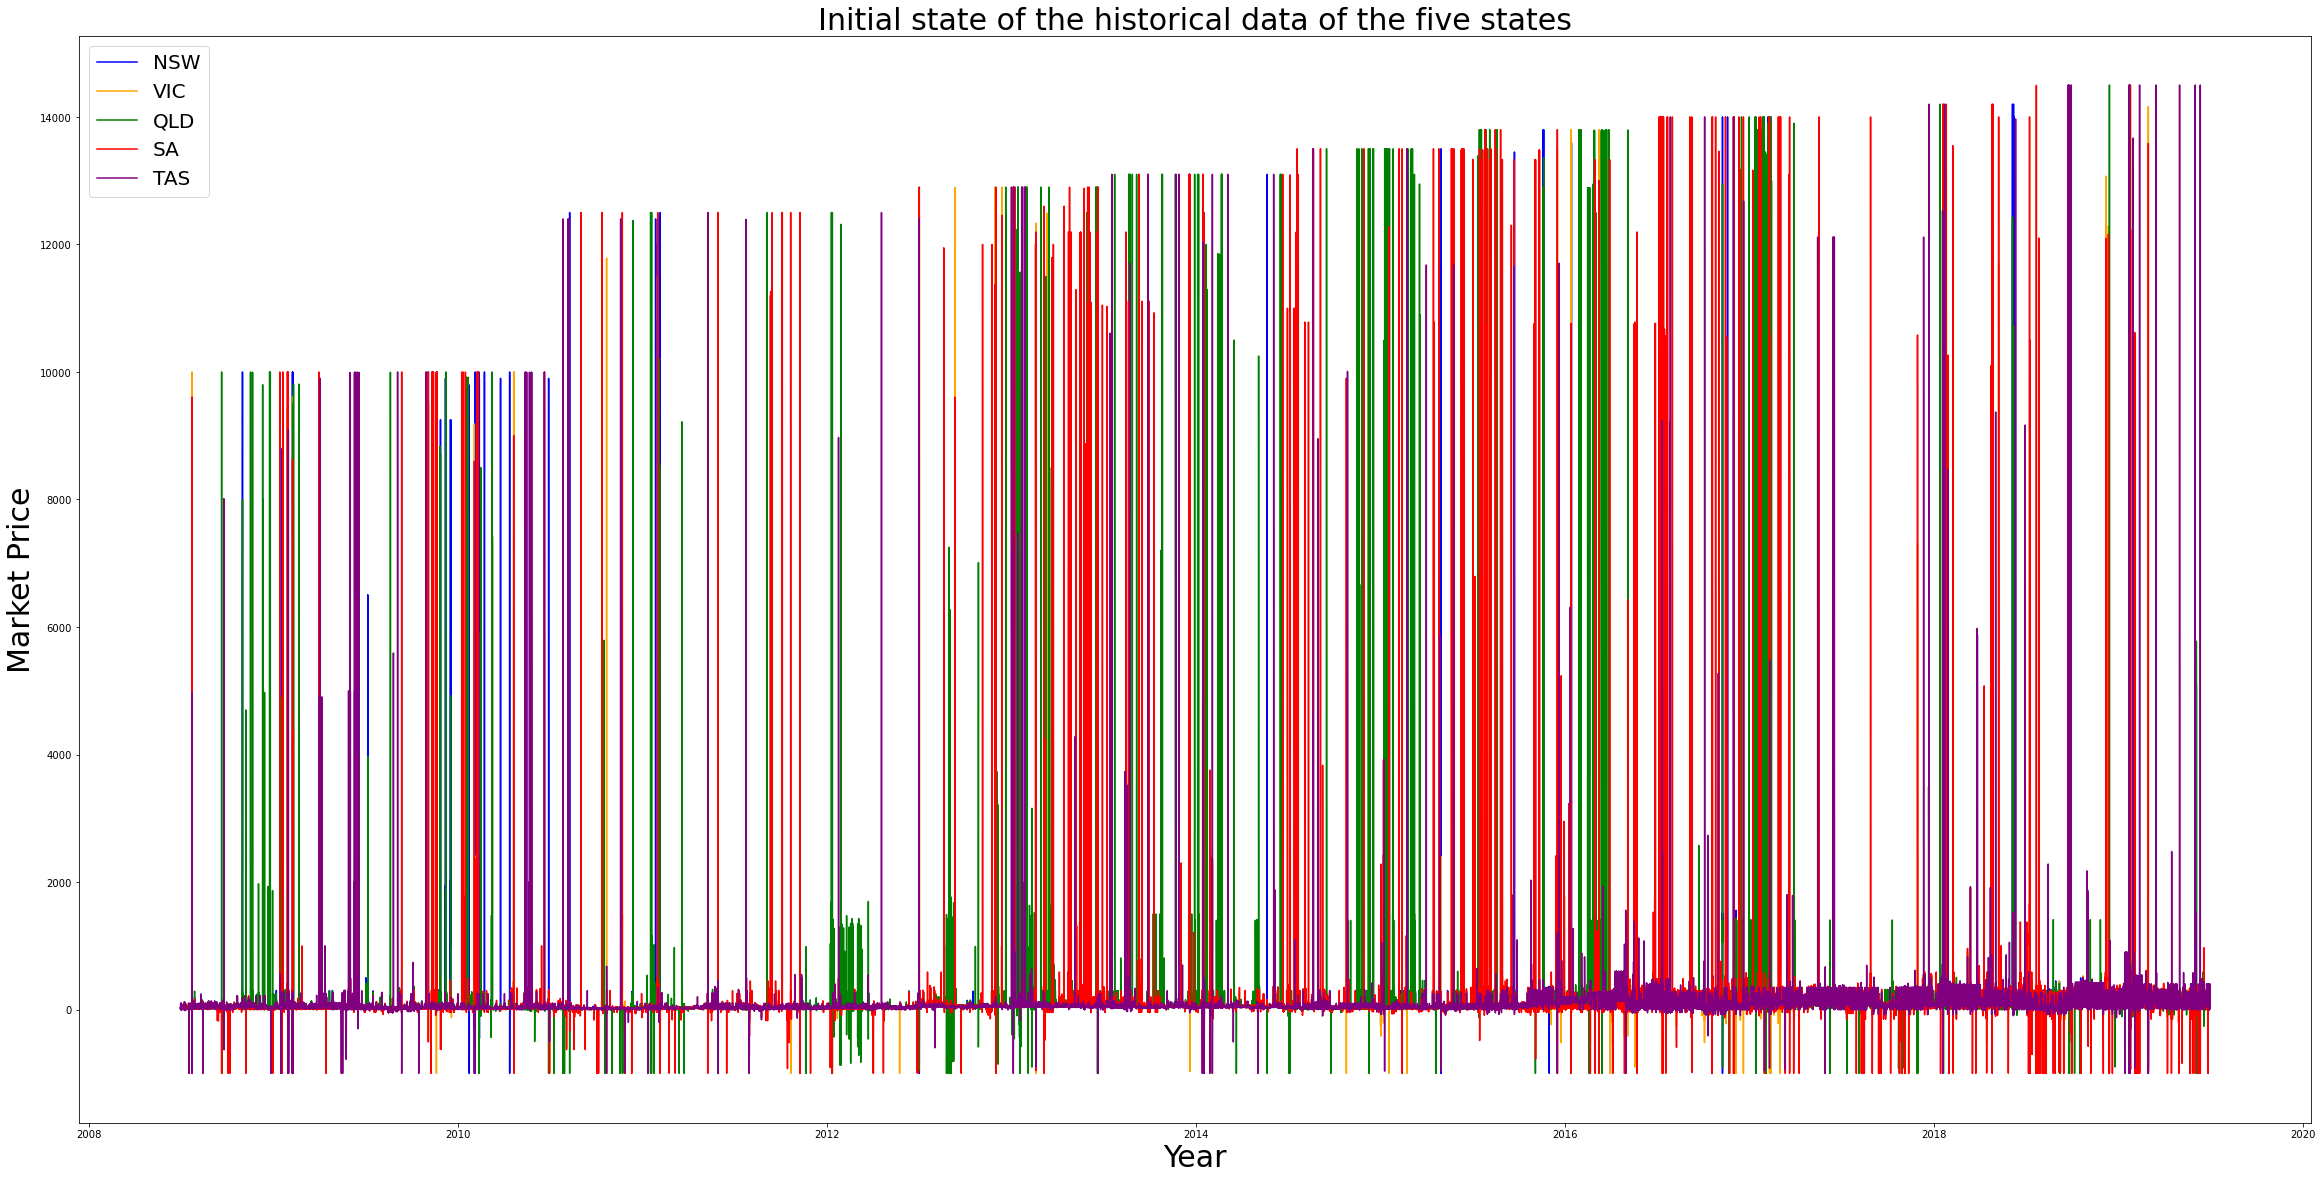

<Figure size 432x288 with 0 Axes>

In [29]:
#??
#Plotting the entire data for peaking.
#from matplotlib import pyplot
%matplotlib inline

plt.figure(figsize=(40,20))
plt.plot(mergedDataNSW_u1,  '-b', label='NSW')
plt.plot(mergedDataVIC_u1, 'orange', label='VIC')
plt.plot(mergedDataQLD_u1, 'green', label = 'QLD')
plt.plot(mergedDataSA_u1, 'red', label='SA')
plt.plot(mergedDataTAS_u1, 'purple', label='TAS')

plt.legend(loc='upper left', prop={"size":20})
plt.xlabel('Year', fontsize=30) 
plt.ylabel('Market Price', fontsize=30)
plt.title("Initial state of the historical data of the five states", fontsize=30)
plt.show()
plt.savefig('C:/Users/User/Desktop/DATA3001/Graphs/nswwholegraph.png')

### observing the distribution of the data

In [ ]:




#explor2 =explor2.reset_index()

In [31]:
# Count of negative values in each states.
explor1=mergedDataNSW_u1['RRP']
explor1=explor1[explor1 < 0]
#explor1 =explor1.reset_index()

explor2=mergedDataNSW_u1['RRP']
explor2=explor2[explor2 > 1000]

explor3=mergedDataVIC_u1['RRP']
explor3=explor3[explor3 < 0]

explor4=mergedDataSA_u1['RRP']
explor4=explor4[explor4 < 0]

explor5=mergedDataQLD_u1['RRP']
explor5=explor5[explor5 < 0]

explor6=mergedDataTAS_u1['RRP']
explor6=explor6[explor6 < 0]

In [34]:
explor1.describe()

count     120.000000
mean     -199.949758
std       382.523321
min     -1000.000000
25%       -61.253082
50%        -0.047800
75%        -0.000170
max        -0.000020
Name: RRP, dtype: float64

In [35]:
explor2.describe()

count      595.000000
mean      7260.722230
std       4306.323608
min       1008.433010
25%       1967.540805
50%       8750.000000
75%      10000.000000
max      14200.000000
Name: RRP, dtype: float64

In [36]:
explor3.describe()

count    2391.000000
mean      -81.513427
std       223.483098
min     -1000.000000
25%       -35.453770
50%        -8.954390
75%        -0.938320
max        -0.000010
Name: RRP, dtype: float64

In [37]:
explor4.describe()

count    9332.000000
mean      -92.016433
std       228.318399
min     -1000.000000
25%       -45.000000
50%       -34.763680
75%        -2.778618
max        -0.000010
Name: RRP, dtype: float64

In [38]:
explor5.describe()

count    1095.000000
mean     -232.850917
std       384.656905
min     -1000.000000
25%      -378.583735
50%        -1.000000
75%        -0.000325
max        -0.000010
Name: RRP, dtype: float64

In [39]:
explor6.describe()

count    12057.000000
mean       -48.349305
std        176.276128
min      -1000.000000
25%        -17.690000
50%         -0.820000
75%         -0.680000
max         -0.000010
Name: RRP, dtype: float64

In [40]:
kdeplots = pd.DataFrame()
kdeplots['NSW']=mergedDataNSW_u1['RRP']
kdeplots['VIC']=mergedDataVIC_u1['RRP']
kdeplots['SA'] = mergedDataSA_u1['RRP']
kdeplots['TAS']=mergedDataTAS_u1['RRP']
kdeplots['QLD']=mergedDataQLD_u1['RRP']

Text(0.5, 1.0, 'Kernel Density Estimation of Data of the five regions')

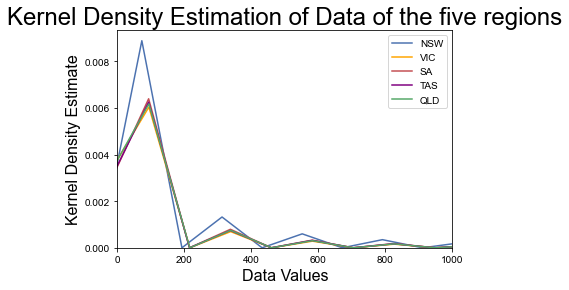

In [41]:
# library and dataset
import seaborn as sns
df = kdeplots
 
# plot of 2 variables
p1=sns.kdeplot(df['NSW'], color="b").set_xlim([0,1000])
p1=sns.kdeplot(df['VIC'], color="orange").set_xlim([0,1000])
p1=sns.kdeplot(df['SA'], color="r").set_xlim([0,1000])
p1=sns.kdeplot(df['TAS'], color="purple").set_xlim([0,1000])
p1=sns.kdeplot(df['QLD'], color="g").set_xlim([0,1000])

sns.set(rc={'figure.figsize':(11.7,8.27)})
#plt.title("Kernel Density Estimation ", size=24)
plt.xlabel("Data Values", size=16)
plt.ylabel("Kernel Density Estimate", size=16)
plt.title("Kernel Density Estimation of Data of the five regions", size=24)
#p1.show()


This data roughly has a normal distribution.

We are not considering the process of stationarizing our data because the distribution is highly concentrated towards values between 10-100 and reduces significantly in frequency beyond/above price (RRP) of 100. This informs the relatively stationary nature of price with respect to time and the fact that data holds the property of constant mean and variance. 

In [42]:
mergedDataNSW_u1.describe()

,RRP
count,1.156896e+06
mean,5.414345e+01
std,1.937744e+02
min,-1.000000e+03
25%,2.734000e+01
50%,4.316916e+01
75%,6.010868e+01
max,1.420000e+04


In [43]:
mergedDataQLD_u1.describe()

,RRP
count,1.156896e+06
mean,5.559166e+01
std,2.812883e+02
min,-1.000000e+03
25%,2.510382e+01
50%,4.150467e+01
75%,5.973022e+01
max,1.450000e+04


In [44]:
mergedDataVIC_u1.describe()

,RRP
count,1.156896e+06
mean,5.331959e+01
std,2.161714e+02
min,-1.000000e+03
25%,2.503988e+01
50%,3.937157e+01
75%,5.923478e+01
max,1.450000e+04


In [45]:
mergedDataSA_u1.describe()

,RRP
count,1.156896e+06
mean,6.527336e+01
std,3.547752e+02
min,-1.000000e+03
25%,2.746446e+01
50%,4.331996e+01
75%,6.807778e+01
max,1.450000e+04


In [46]:
mergedDataTAS_u1.describe()

,RRP
count,1.156896e+06
mean,5.749590e+01
std,1.722525e+02
min,-1.000000e+03
25%,2.828000e+01
50%,4.093128e+01
75%,6.879859e+01
max,1.450000e+04


In [71]:
#mergedData_yearlyAnalysis_u1NSW = mergedData_yearlyAnalysis_u1NSW.reset_index()

mergedData_yearlyAnalysis_u1VIC.reset_index()[['DATE']]

,DATE
0,2008-07-01
1,2008-07-02
2,2008-07-03
3,2008-07-04
4,2008-07-05
...,...
4013,2019-06-27
4014,2019-06-28
4015,2019-06-29
4016,2019-06-30


In [76]:
mergedData_yearlyAnalysis_u1NSW = mergedData_yearlyAnalysis_u1[mergedData_yearlyAnalysis_u1['REGIONID'] == 'NSW1']
mergedData_yearlyAnalysis_u1NSW = mergedData_yearlyAnalysis_u1NSW.reset_index()[['DATE', 'RRP']]
#Changed the format from normal column 
mergedData_yearlyAnalysis_u1NSW = mergedData_yearlyAnalysis_u1NSW.reset_index()
#
#mergedData_yearlyAnalysis_u1NSW[['DATE']]= pd.to_datetime(mergedData_yearlyAnalysis_u1NSW[['DATE']])



mergedData_yearlyAnalysis_u1VIC = mergedData_yearlyAnalysis_u1[mergedData_yearlyAnalysis_u1['REGIONID'] == 'VIC1']
mergedData_yearlyAnalysis_u1VIC = mergedData_yearlyAnalysis_u1VIC.reset_index()[['DATE', 'RRP']]

mergedData_yearlyAnalysis_u1TAS = mergedData_yearlyAnalysis_u1[mergedData_yearlyAnalysis_u1['REGIONID'] == 'TAS1']
mergedData_yearlyAnalysis_u1TAS = mergedData_yearlyAnalysis_u1TAS.reset_index()[['DATE', 'RRP']]

mergedData_yearlyAnalysis_u1QLD = mergedData_yearlyAnalysis_u1[mergedData_yearlyAnalysis_u1['REGIONID'] == 'QLD1']
mergedData_yearlyAnalysis_u1QLD = mergedData_yearlyAnalysis_u1QLD.reset_index()[['DATE', 'RRP']]

mergedData_yearlyAnalysis_u1SA = mergedData_yearlyAnalysis_u1[mergedData_yearlyAnalysis_u1['REGIONID'] == 'SA1']
mergedData_yearlyAnalysis_u1SA = mergedData_yearlyAnalysis_u1SA.reset_index()[['DATE', 'RRP']]


### TO FIND THE AVERAGE OF THE OBSERVATION OVER THE ENTIRE DAY, IT SEEMS WE HAVE TO NOT SET THE 'DATE' AS THE INDEX, THIS MAKES THE COMPILER TO NOT CONSIDER IT AS A COLUMN.

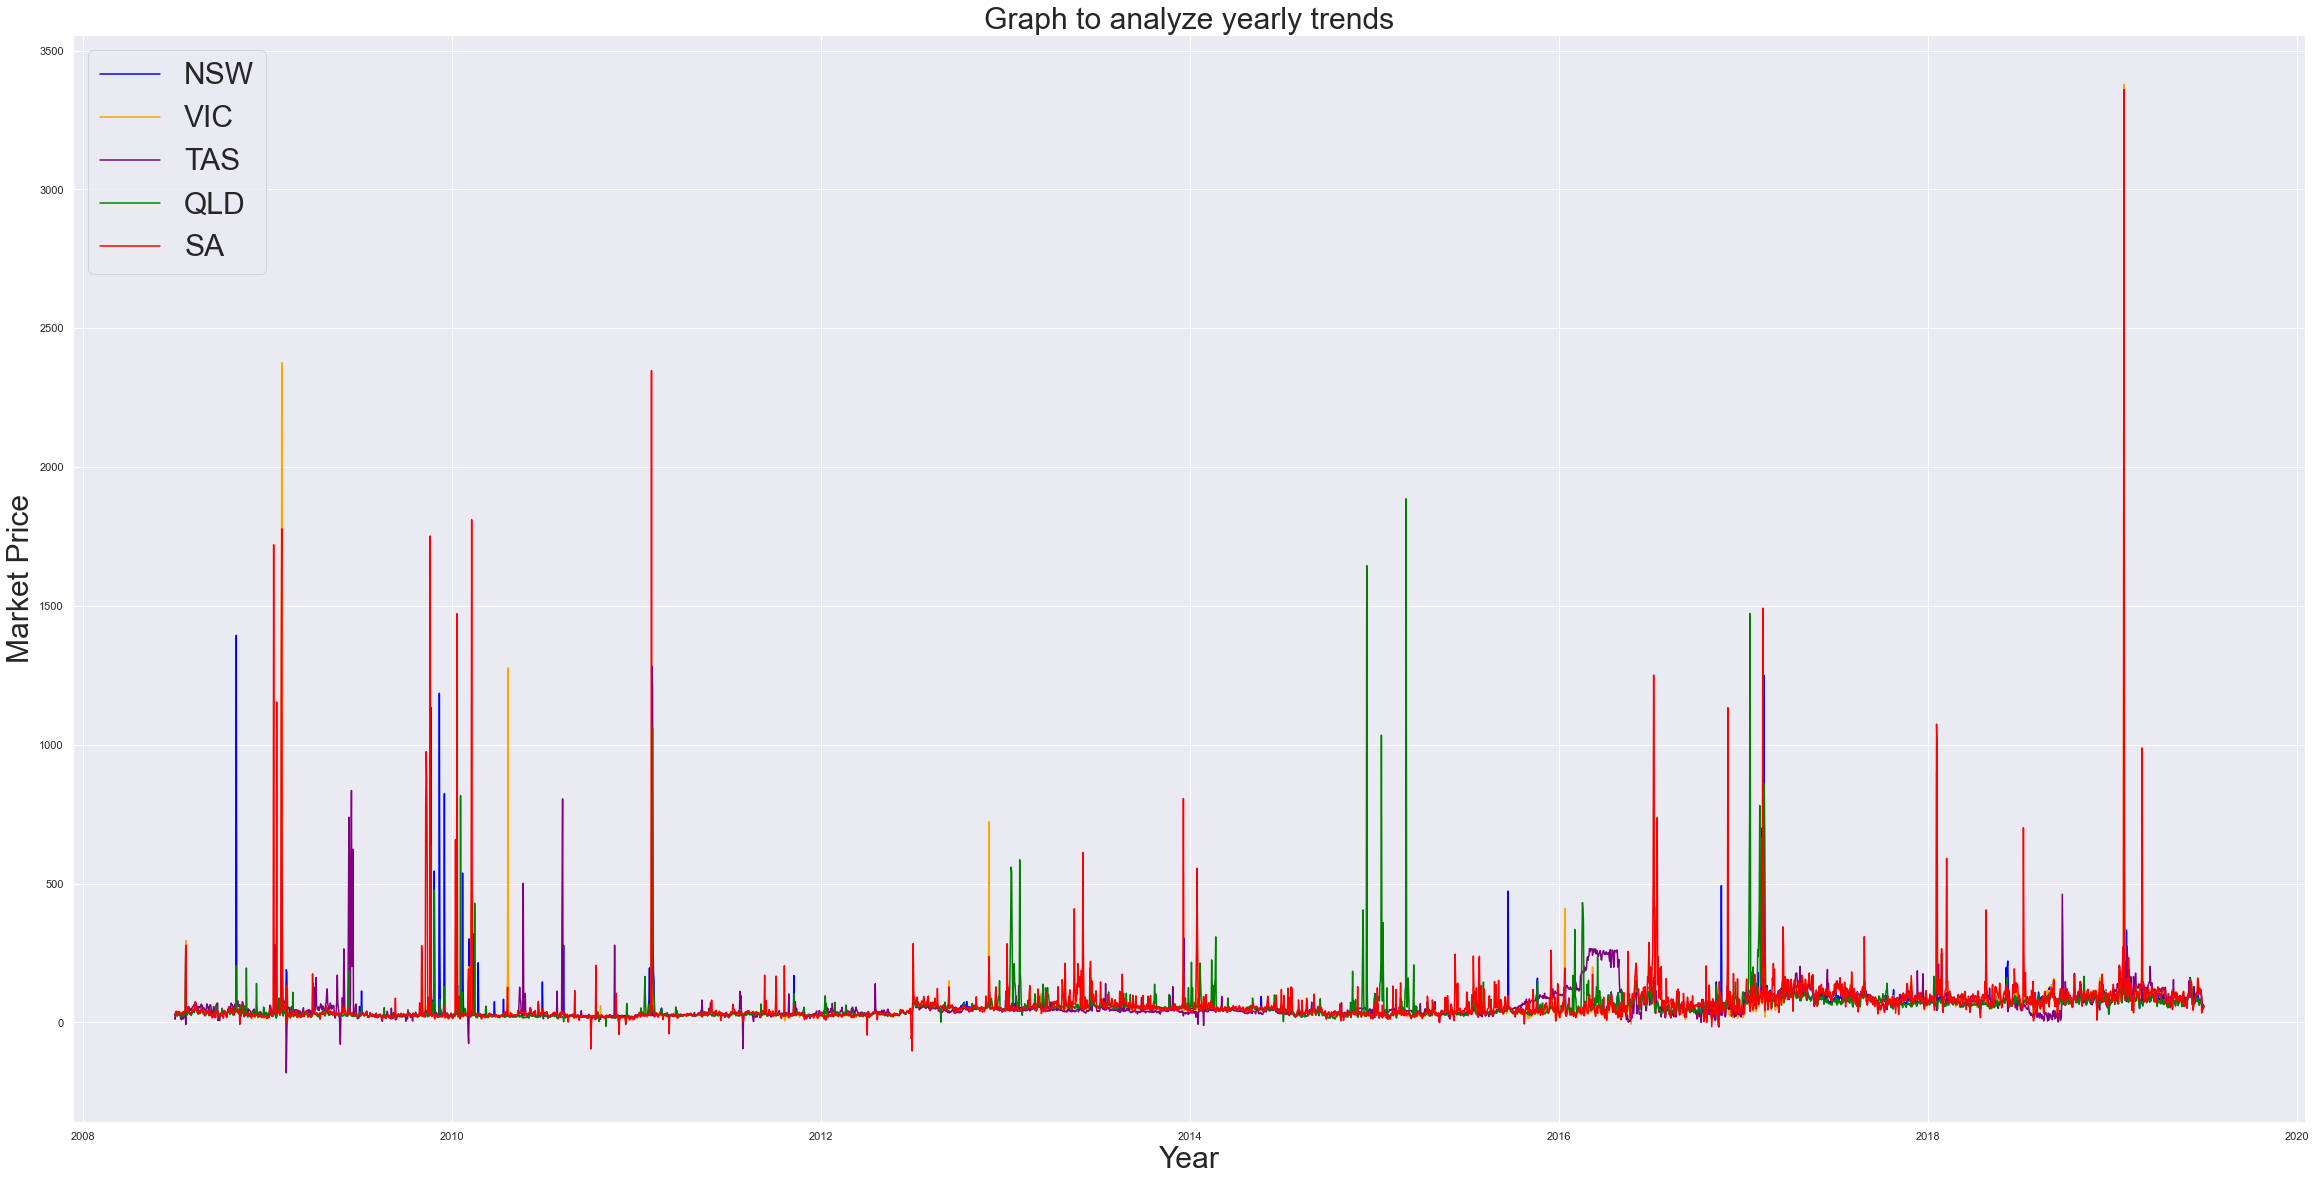

In [77]:
#Using average of each day.
#pd.DataFrame(mergedData_yearlyAnalysis_u1NSW)
mergedData_yearlyAnalysis_u1NSW['DATE']= pd.to_datetime(mergedData_yearlyAnalysis_u1NSW['DATE'])
mergedData_yearlyAnalysis_u1VIC['DATE']= pd.to_datetime(mergedData_yearlyAnalysis_u1VIC['DATE'])
mergedData_yearlyAnalysis_u1TAS['DATE']= pd.to_datetime(mergedData_yearlyAnalysis_u1TAS['DATE'])
mergedData_yearlyAnalysis_u1QLD['DATE']= pd.to_datetime(mergedData_yearlyAnalysis_u1QLD['DATE'])
mergedData_yearlyAnalysis_u1SA['DATE']= pd.to_datetime(mergedData_yearlyAnalysis_u1SA['DATE'])

x = mergedData_yearlyAnalysis_u1NSW['DATE']
y = mergedData_yearlyAnalysis_u1NSW['RRP']

x1 = mergedData_yearlyAnalysis_u1VIC['DATE']
y1 = mergedData_yearlyAnalysis_u1VIC['RRP']

x2 = mergedData_yearlyAnalysis_u1TAS['DATE']
y2 = mergedData_yearlyAnalysis_u1TAS['RRP']

x3 = mergedData_yearlyAnalysis_u1QLD['DATE']
y3 = mergedData_yearlyAnalysis_u1QLD['RRP']

x4 = mergedData_yearlyAnalysis_u1SA['DATE']
y4 = mergedData_yearlyAnalysis_u1SA['RRP']

plt.figure(figsize=(40,20))
plt.plot(x,y, color='blue', label='NSW')
plt.plot(x1,y1, color='orange', label='VIC')
plt.plot(x2,y2,color='purple', label='TAS')
plt.plot(x3,y3, color='green', label='QLD')
plt.plot(x4,y4, color='red', label= 'SA')

plt.title("Graph to analyze yearly trends", fontsize=30)

plt.xlabel('Year', fontsize=30) 
plt.ylabel('Market Price', fontsize=30)

plt.legend(prop={"size":30})
axes = plt. gca()

plt.show()

In [81]:
mergedData_yearlyAnalysis_u1NSW = mergedData_yearlyAnalysis_u1NSW.set_index('DATE')
mergedData_yearlyAnalysis_u1VIC = mergedData_yearlyAnalysis_u1VIC.set_index('DATE')
mergedData_yearlyAnalysis_u1TAS = mergedData_yearlyAnalysis_u1TAS.set_index('DATE')
mergedData_yearlyAnalysis_u1QLD = mergedData_yearlyAnalysis_u1QLD.set_index('DATE')
mergedData_yearlyAnalysis_u1SA = mergedData_yearlyAnalysis_u1SA.set_index('DATE')

In [91]:
mergedData_yearlyAnalysis_u1NSW.drop(['index'], axis=1, inplace =True)

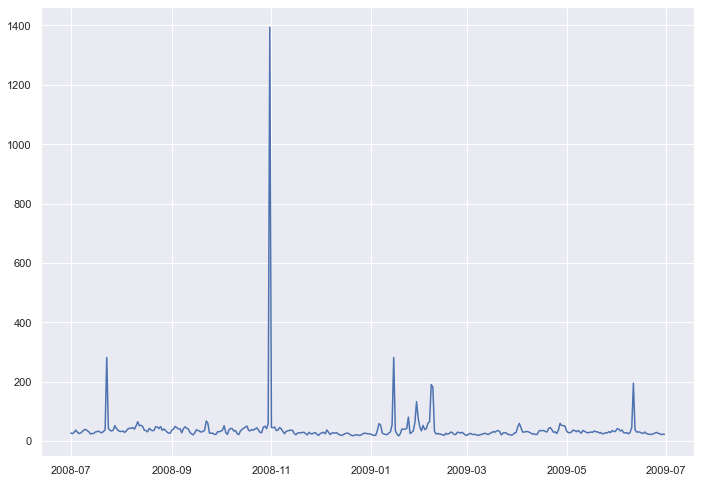

In [102]:
#1year_NSW = 
plt.plot(mergedData_yearlyAnalysis_u1NSW[365*0:365*1])
plt.show()

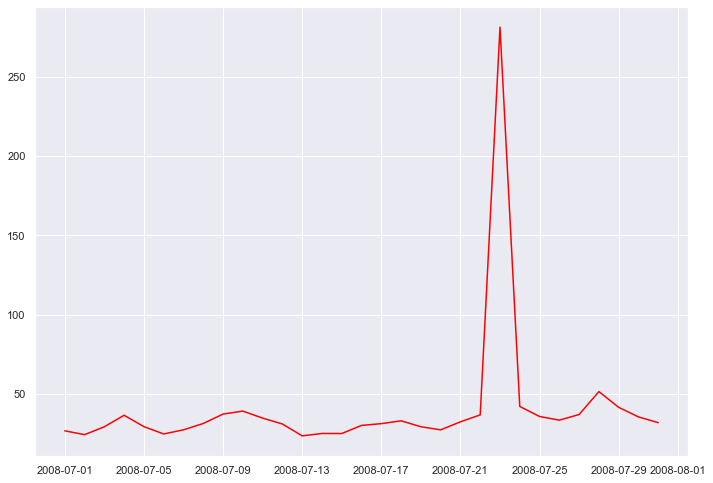

In [108]:
#
plt.plot(mergedData_yearlyAnalysis_u1NSW[365*0:31*1], color='red')
plt.show()

#### AUTOCORRELATION FOR NSW (11 YRS DATA)

### BUT FOR AUTOCORRELATION PLOTS IT SEEMS YOU NEED THE DATE AXIS TO BE SET AS AN INDEX. 
### SO I WENT BACK AND UNCOMMENTED THE FIELD RELATING TO mergedData_yearlyAnalysis_u1NSW and FOR VIC,TAS,SA,QLD

In [109]:
from pandas.plotting import autocorrelation_plot

<ipython-input-110-75df2521e499>:7: MatplotlibDeprecationWarning: Unrecognized location 'top left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  plt.legend(loc='top left')
No handles with labels found to put in legend.


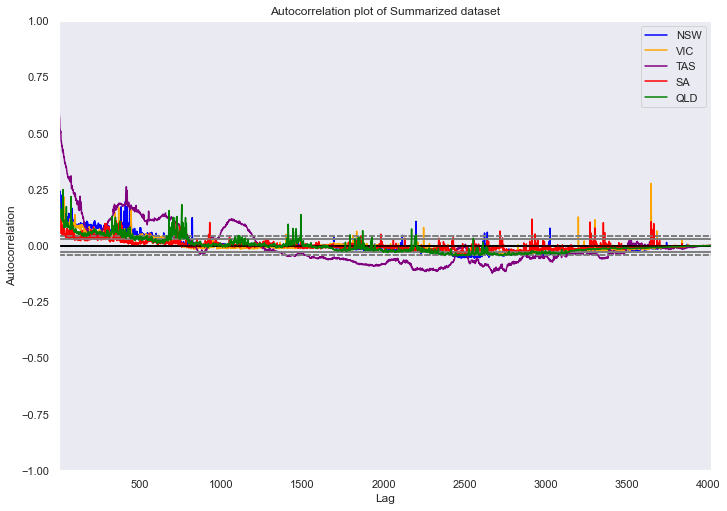

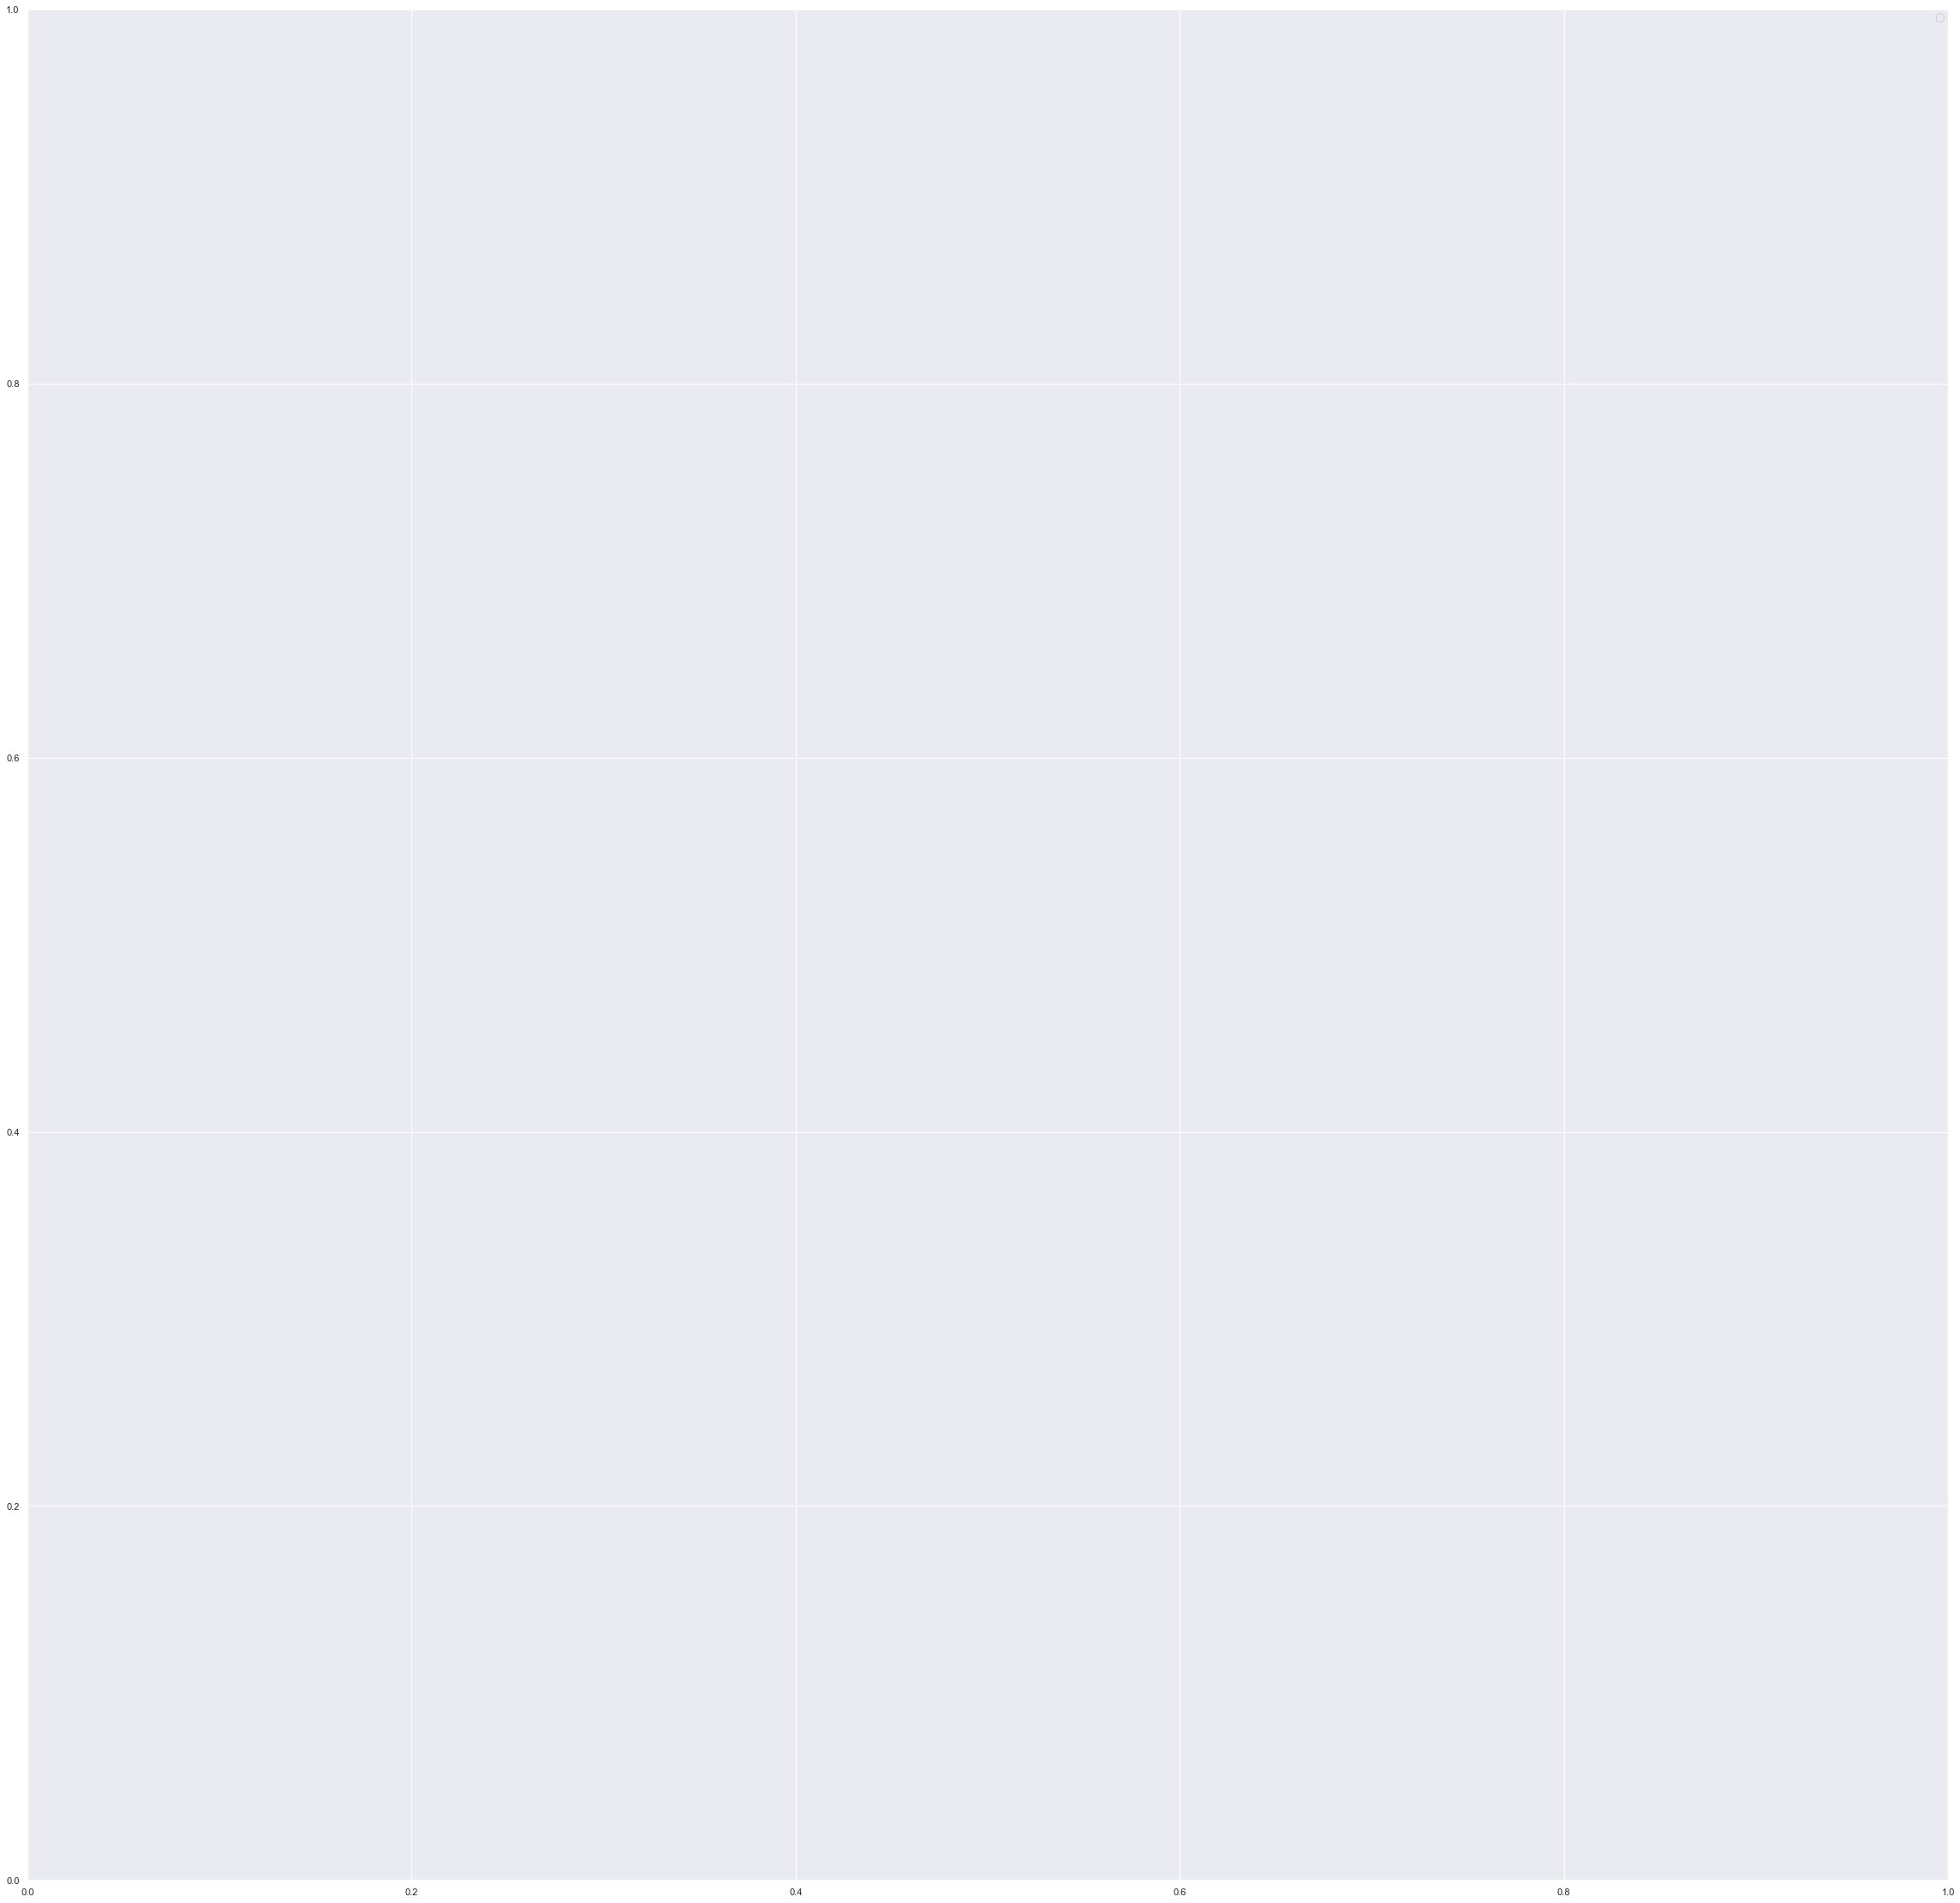

In [110]:
autocorrelation_plot(mergedData_yearlyAnalysis_u1NSW, color= 'blue', label='NSW')
autocorrelation_plot(mergedData_yearlyAnalysis_u1VIC,color= 'orange', label='VIC')
autocorrelation_plot(mergedData_yearlyAnalysis_u1TAS,color= 'purple', label='TAS')
autocorrelation_plot(mergedData_yearlyAnalysis_u1SA,color= 'red', label='SA')
autocorrelation_plot(mergedData_yearlyAnalysis_u1QLD,color= 'green', label='QLD')

plt.legend(loc='top left')
plt.title("Autocorrelation plot of Summarized dataset")
plt.figure(figsize=(40,40))
plt.legend()
plt.show()

### Limiting the x-axis to the first 500 to get a clear representation of the autocorrelation trend. 

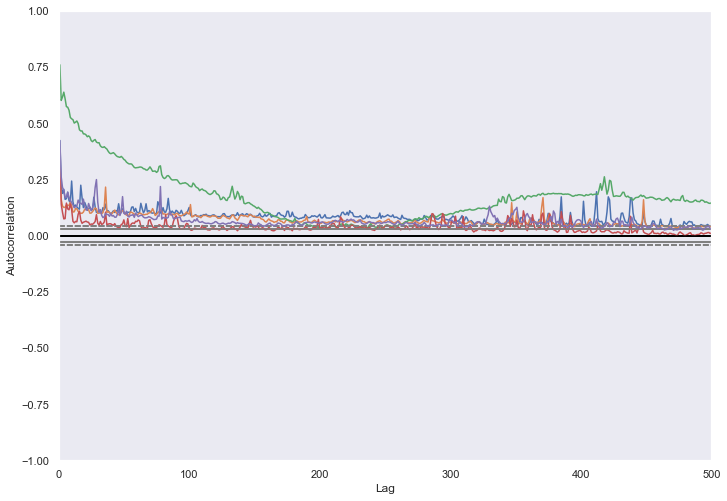

<Figure size 2880x2880 with 0 Axes>

In [111]:
autocorrelation_plot(mergedData_yearlyAnalysis_u1NSW).set_xlim([0,500])
autocorrelation_plot(mergedData_yearlyAnalysis_u1VIC).set_xlim([0,500])
autocorrelation_plot(mergedData_yearlyAnalysis_u1TAS).set_xlim([0,500])
autocorrelation_plot(mergedData_yearlyAnalysis_u1SA).set_xlim([0,500])
autocorrelation_plot(mergedData_yearlyAnalysis_u1QLD).set_xlim([0,500])

plt.figure(figsize=(40,40))
plt.show()

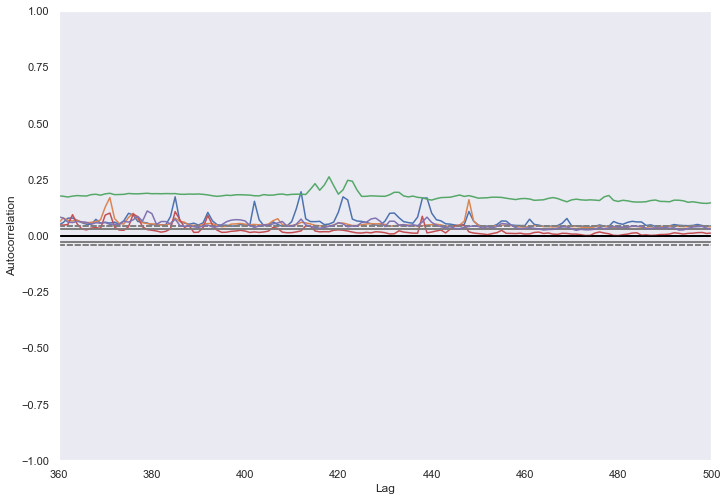

<Figure size 2880x2880 with 0 Axes>

In [112]:
autocorrelation_plot(mergedData_yearlyAnalysis_u1NSW).set_xlim([360,500])
autocorrelation_plot(mergedData_yearlyAnalysis_u1VIC).set_xlim([360,500])
autocorrelation_plot(mergedData_yearlyAnalysis_u1TAS).set_xlim([360,500])
autocorrelation_plot(mergedData_yearlyAnalysis_u1SA).set_xlim([360,500])
autocorrelation_plot(mergedData_yearlyAnalysis_u1QLD).set_xlim([360,500])

plt.figure(figsize=(40,40))
plt.show()

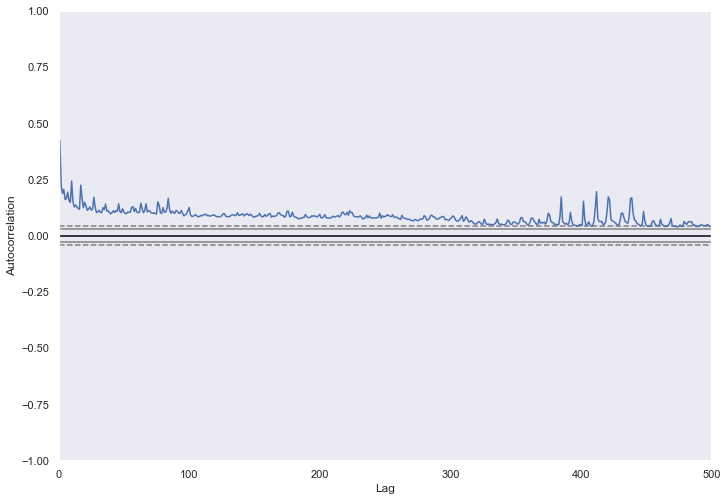

<Figure size 2160x1440 with 0 Axes>

In [113]:
autocorrelation_plot(mergedData_yearlyAnalysis_u1NSW).set_xlim([0,500])
plt.figure(figsize=(30,20))
plt.show()

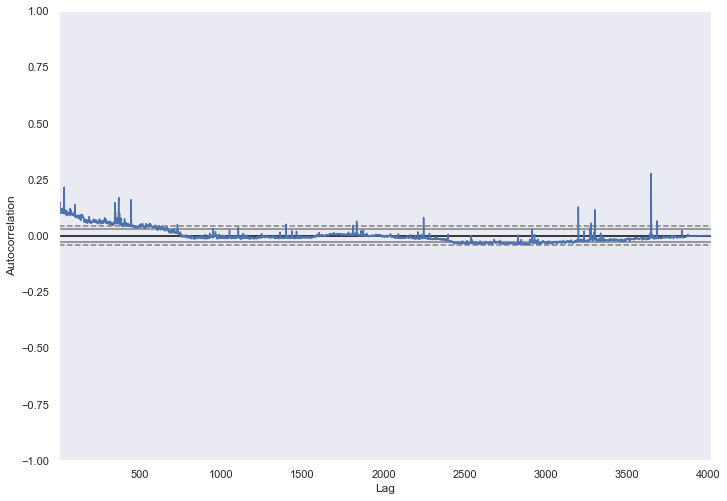

<Figure size 2160x1440 with 0 Axes>

In [114]:
autocorrelation_plot(mergedData_yearlyAnalysis_u1VIC)
plt.figure(figsize=(30,20))
plt.show()

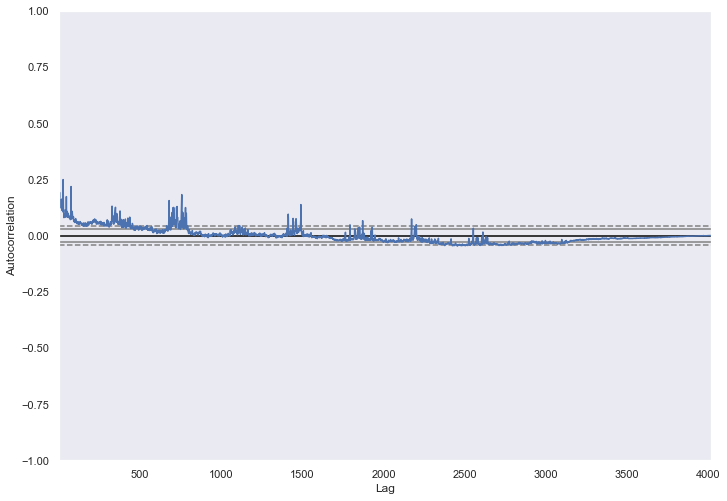

<Figure size 2160x1440 with 0 Axes>

In [115]:
autocorrelation_plot(mergedData_yearlyAnalysis_u1QLD)
plt.figure(figsize=(30,20))
plt.show()

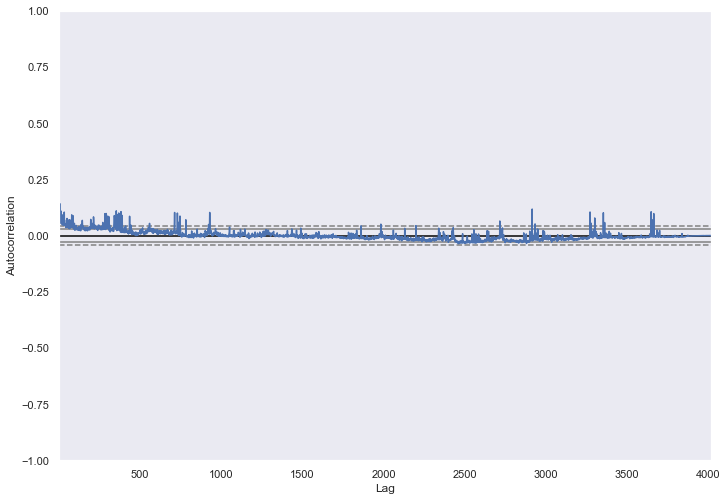

<Figure size 2160x1440 with 0 Axes>

In [116]:
autocorrelation_plot(mergedData_yearlyAnalysis_u1SA)
plt.figure(figsize=(30,20))
plt.show()

[]

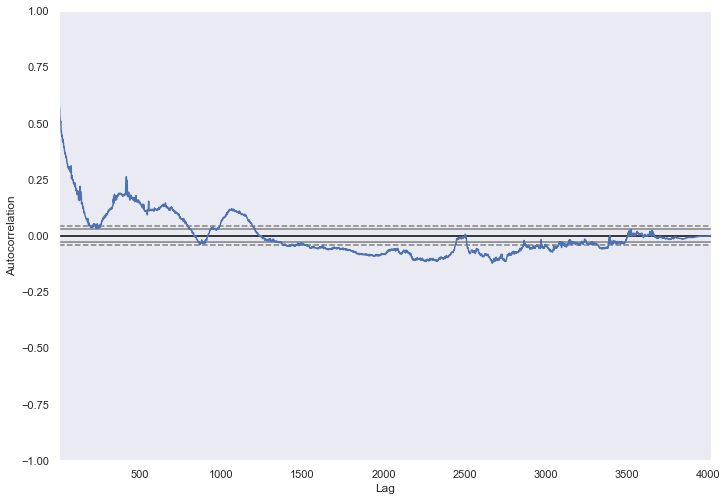

In [117]:
autocorrelation_plot(mergedData_yearlyAnalysis_u1TAS)
#plt.figure(figsize=(30,20))
plt.plot(color ='red')

#HAVE AUTOCORRELATION PLOTS AFTER DIFFERENCING
#sarima

## We need to difference each of the datasets to make it reach the autocorrelation value to 0 as quickly as possible. This ensures that we remove the seasonality property of the data and reasonably stationarize it to develop good training sets for our model to train on. 

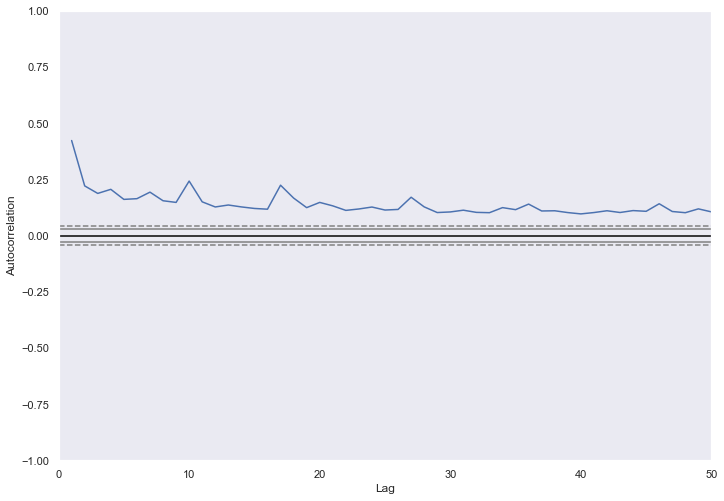

<Figure size 2160x1440 with 0 Axes>

In [118]:
#NSW
autocorrelation_plot(mergedData_yearlyAnalysis_u1NSW).set_xlim([0,50])
plt.figure(figsize=(30,20))
plt.show()

### Why make a non-stationary series stationary before forecasting?

Forecasting a stationary series is relatively easy and the forecasts are more reliable.

An important reason is, autoregressive forecasting models are essentially linear regression models that utilize the lag(s) of the series itself as predictors.

We know that linear regression works best if the predictors (X variables) are not correlated against each other. So, stationarizing the series solves this problem since it removes any persistent autocorrelation, thereby making the predictors(lags of the series) in the forecasting models nearly independent.

In [119]:
diff1_NSWseries = mergedData_yearlyAnalysis_u1NSW.diff()
diff1_NSWseries = diff1_NSWseries[1:]

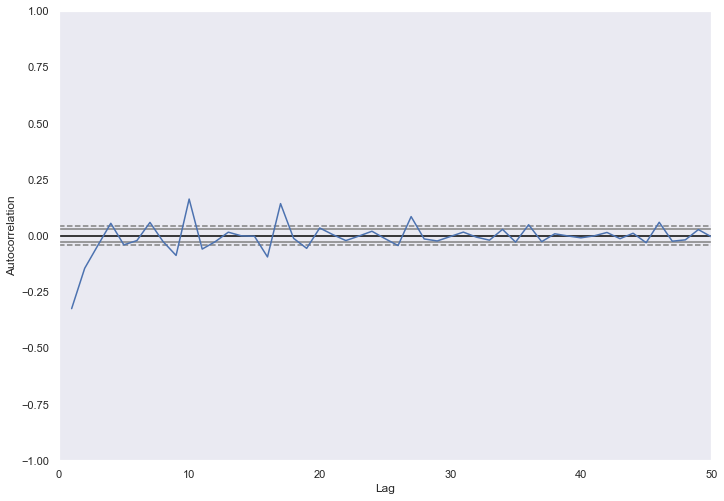

<Figure size 2160x1440 with 0 Axes>

In [120]:
autocorrelation_plot(diff1_NSWseries).set_xlim([0,50])
plt.figure(figsize=(30,20))
plt.show()

In [121]:
diff2_NSWseries = diff1_NSWseries.diff()
diff2_NSWseries = diff2_NSWseries[1:]

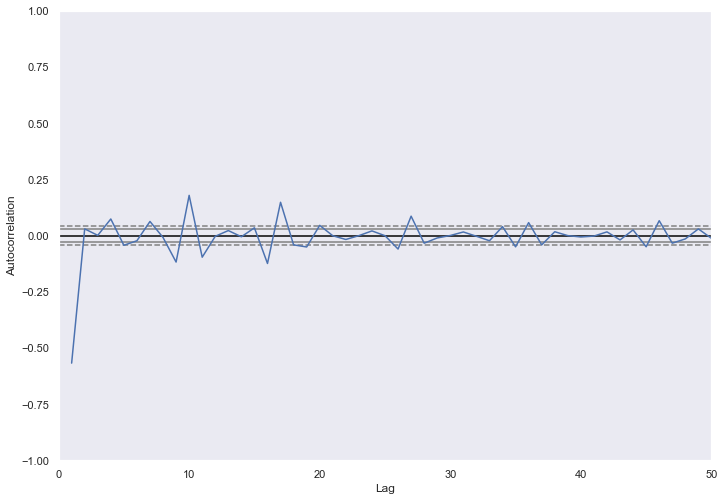

<Figure size 2160x1440 with 0 Axes>

In [122]:
autocorrelation_plot(diff2_NSWseries).set_xlim([0,50])
plt.figure(figsize=(30,20))
plt.show()

### There is no substantial difference between diff1 and diff2 autocorrelation plot, both of the tend to the value of 0 relatively quickly. Hence, differencing order of 1 is sufficient to stationarize the series. 

In [123]:
#mergedData_yearlyAnalysis_u1VIC = mergedData_yearlyAnalysis_u1VIC.set_index('DATE')

<Figure size 2160x1440 with 0 Axes>

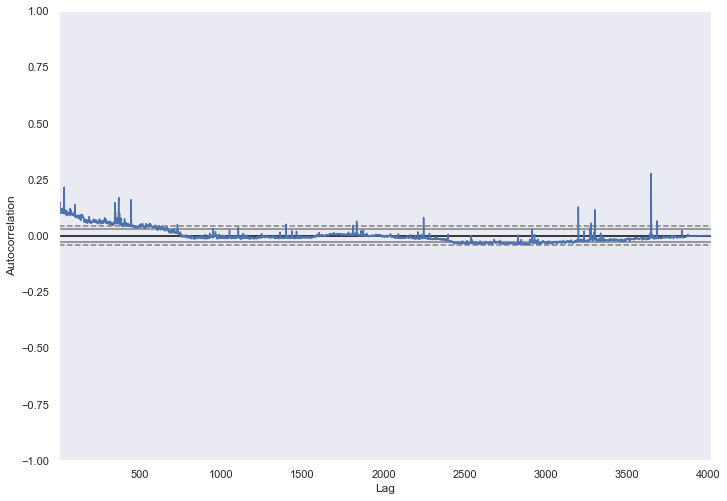

<Figure size 2160x1440 with 0 Axes>

In [124]:
#VIC
diff1_VICseries = mergedData_yearlyAnalysis_u1VIC.diff()
diff1_VICseries = diff1_VICseries[1:]


autocorrelation_plot(mergedData_yearlyAnalysis_u1VIC)
plt.figure(figsize=(30,20))

<Figure size 2160x1440 with 0 Axes>

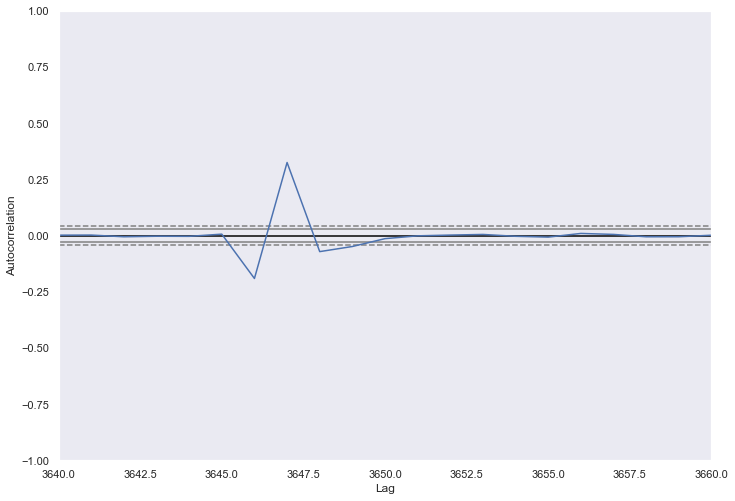

<Figure size 2160x1440 with 0 Axes>

In [125]:
autocorrelation_plot(diff1_VICseries).set_xlim([3640,3660])
plt.figure(figsize=(30,20))

<Figure size 2160x1440 with 0 Axes>

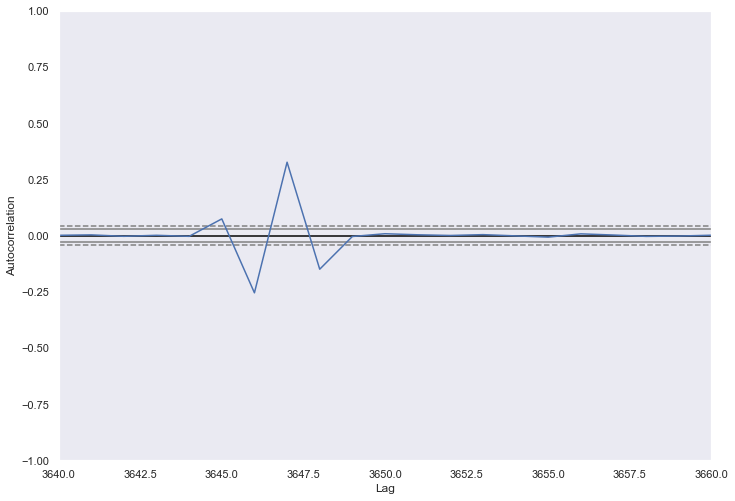

<Figure size 2160x1440 with 0 Axes>

In [126]:
diff2_VICseries = diff1_VICseries.diff()
diff2_VICseries = diff2_VICseries[1:]
autocorrelation_plot(diff2_VICseries).set_xlim([3640,3660])
plt.figure(figsize=(30,20))

### From our observation of the Victoria region we can infer a lag of about 3647. This translates to roughly about 10 years. This is the case as 1 year has about 365 instances of data and 3647 / 365 ~= 9.98630. 

### However, it would be better if could observe this trend over a few decades rather than just once. This could've been just due to pure randomness and there by due to lack of sufficient data, we did not proceed to make a feature referring to observation 10 years ago. 

<Figure size 2160x1440 with 0 Axes>

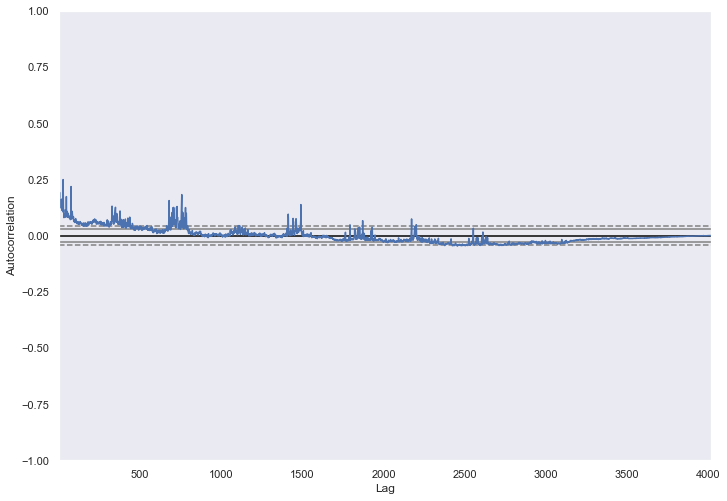

<Figure size 2160x1440 with 0 Axes>

In [127]:
#QLD
diff1_QLDseries = mergedData_yearlyAnalysis_u1QLD.diff()
diff1_QLDseries = diff1_QLDseries[1:]


autocorrelation_plot(mergedData_yearlyAnalysis_u1QLD)
plt.figure(figsize=(30,20))

<Figure size 2160x1440 with 0 Axes>

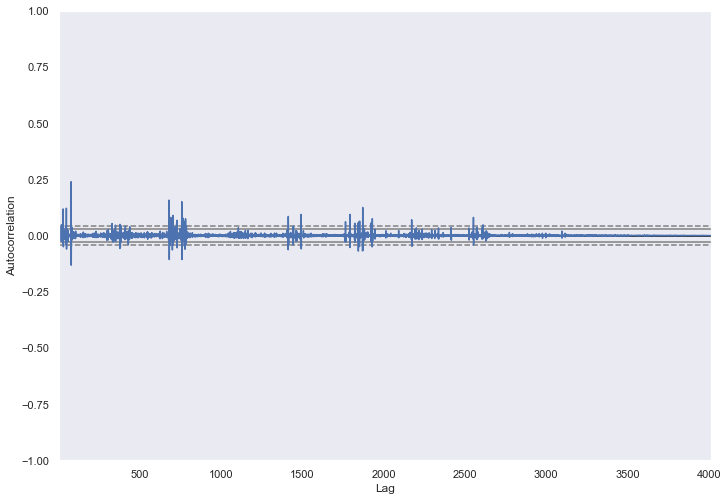

<Figure size 2160x1440 with 0 Axes>

In [128]:
diff1_QLDseries = mergedData_yearlyAnalysis_u1QLD.diff()
diff1_QLDseries = diff1_QLDseries[1:]

autocorrelation_plot(diff1_QLDseries)
plt.figure(figsize=(30,20))

<Figure size 2160x1440 with 0 Axes>

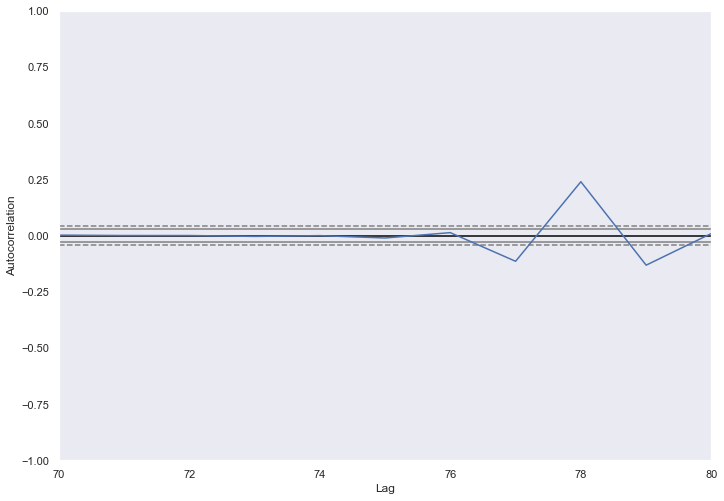

<Figure size 2160x1440 with 0 Axes>

In [129]:
autocorrelation_plot(diff1_QLDseries).set_xlim([70,80])
plt.figure(figsize=(30,20))

<Figure size 2160x1440 with 0 Axes>

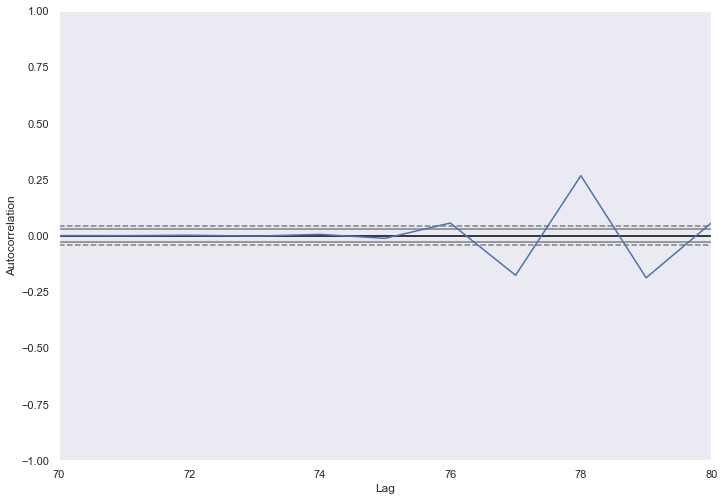

<Figure size 2160x1440 with 0 Axes>

In [130]:
diff2_QLDseries = diff1_QLDseries.diff()
diff2_QLDseries = diff2_QLDseries[1:]
autocorrelation_plot(diff2_QLDseries).set_xlim([70,80])
plt.figure(figsize=(30,20))

<Figure size 2160x1440 with 0 Axes>

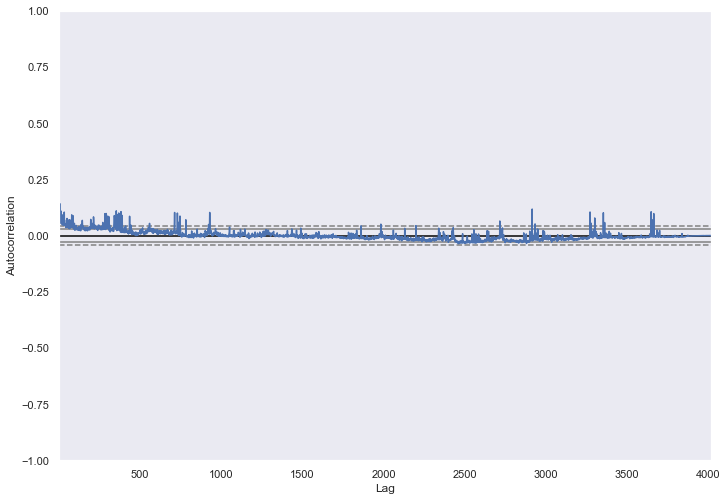

<Figure size 2160x1440 with 0 Axes>

In [131]:
#SA
autocorrelation_plot(mergedData_yearlyAnalysis_u1SA)
plt.figure(figsize=(30,20))

<Figure size 2160x1440 with 0 Axes>

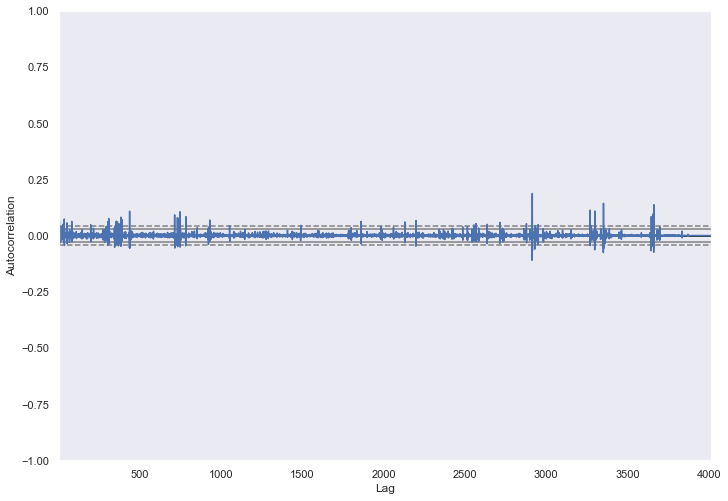

<Figure size 2160x1440 with 0 Axes>

In [132]:
diff1_SAseries = mergedData_yearlyAnalysis_u1SA.diff()
diff1_SAseries = diff1_SAseries[1:]

autocorrelation_plot(diff1_SAseries)
plt.figure(figsize=(30,20))

<Figure size 2160x1440 with 0 Axes>

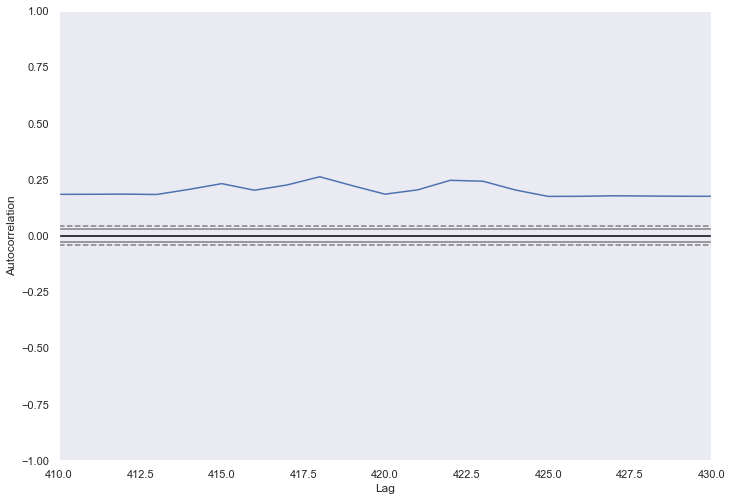

<Figure size 2160x1440 with 0 Axes>

In [133]:
#TAS - ZOOMED INTO THE RANGE OF 410-430
diff1_TASseries = mergedData_yearlyAnalysis_u1TAS.diff()
diff1_TASseries = diff1_TASseries[1:]

autocorrelation_plot(mergedData_yearlyAnalysis_u1TAS).set_xlim([410,430])
plt.figure(figsize=(30,20))

<Figure size 2160x1440 with 0 Axes>

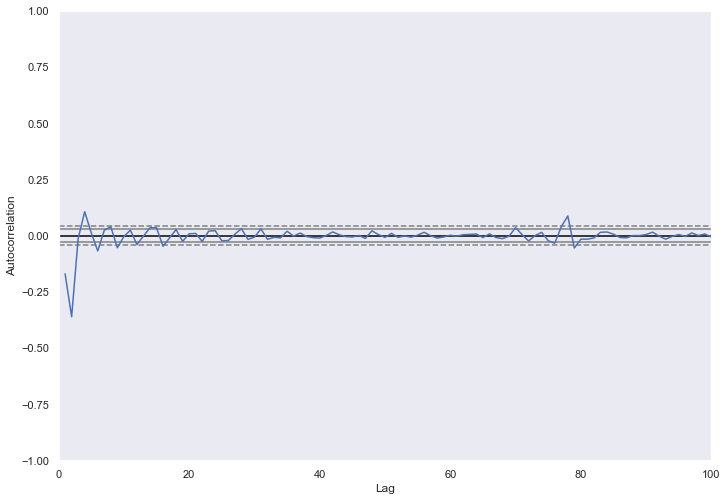

<Figure size 2160x1440 with 0 Axes>

In [134]:
autocorrelation_plot(diff1_TASseries).set_xlim([0,100])
plt.figure(figsize=(30,20))

### For Tasmania, we can see that the order of differening of 1, makes the graph reach the value of 0 reasonably quickly. 

In [135]:
mergedDataNSW_u1_2008_1yr = mergedDataNSW_u1.loc['2008-07-01 00:00:00': '2009-07-01 00:00:00']
mergedDataNSW_u1_2013_1yr = mergedDataNSW_u1.loc['2013-07-01 00:00:00': '2014-07-01 00:00:00']
mergedDataNSW_u1_2018_1yr = mergedDataNSW_u1.loc['2018-07-01 00:00:00': '2019-07-01 00:00:00']

In [136]:
from pandas.plotting import autocorrelation_plot

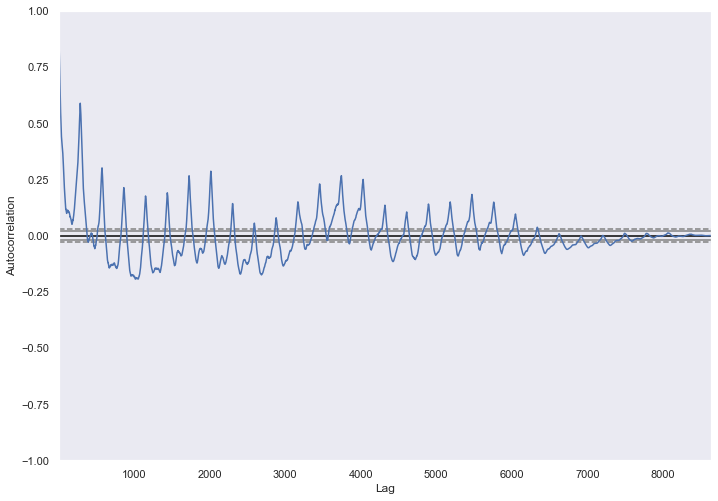

In [137]:
#for 1 month
mergedDataNSW_u1_2008_1month = mergedDataNSW_u1['2008-09-01 00:00:00': '2008-10-01 00:00:00']
autocorrelation_plot(mergedDataNSW_u1_2008_1month)
plt.show()

### Zoomed in version of the above graph

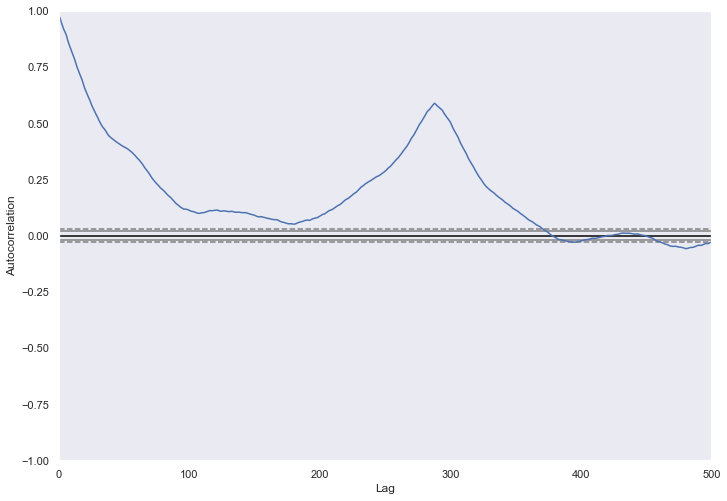

In [138]:
mergedDataNSW_u1_2008_1month = mergedDataNSW_u1['2008-09-01 00:00:00': '2008-10-01 00:00:00']
autocorrelation_plot(mergedDataNSW_u1_2008_1month).set_xlim([0,500])
plt.show()

#### We observe that there is a lag of about 285-290 observations. This can be interpreted as the unravelling of a lag of 288 observations that occurs because of the 24-hour cycle - observations now tends to correlate with observations 24 hours ago. 

#### Thus an extremely useful feature is to incorporate prices from 24-hour prior inorder to predict prices one day in the future. 

#### As by our analysis, the 24-hour lag seems to be more useful than a weekly, monthly or an yearly pattern in-relation to the autocorrelation value being 0.5 as opposed to peaks of about between 0.1-0.2 in observing for an yearly/monthly trend. 

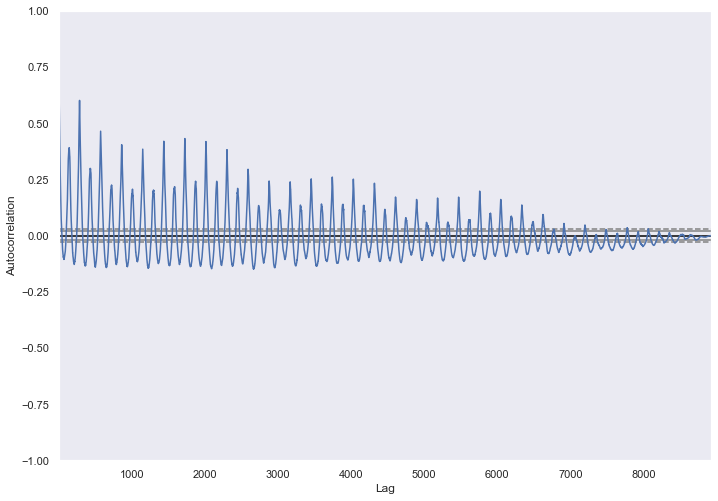

In [139]:
mergedDataNSW_u1_2018_1month = mergedDataNSW_u1['2018-08-01 00:00:00': '2018-09-01 00:00:00']
autocorrelation_plot(mergedDataNSW_u1_2018_1month)
plt.show()

### Training set and testing set split

##### Information collected from the client states that our model would be tested over the period of 3 months. Inorder to capture the trends that occur over the year, we have decided to allocate 1 year worth of data to the testing set. Furthermore, as we will see later, by our autocorrelation plots, there is a good indication for the results with 1 year gap between are reasonably dependant and holds predictive value. 

# ARIMA MODEL

## NSW

In [141]:
mergedDataNSW_u1_TRAIN = mergedDataNSW_u1['2008-07-01 00:00:00':'2018-07-01 00:00:00']

In [142]:
mergedDataNSW_u1_TEST = mergedDataNSW_u1['2019-01-01 00:00:00':'2019-07-01 00:00:00']

In [143]:
mergedDataNSW_u1_TRAIN.to_csv(r'C:/Users/User/Desktop/DATA3001/mergedDataNSW_u1_TRAIN.csv', index = True)

In [ ]:
mergedDataNSW_u1_TEST.to_csv(r'C:/Users/User/Desktop/DATA3001/mergedDataNSW_u1_TEST.csv', index = True)

### We difference the data by the order of 1, as per our previous analysis to minimize the anomalies. 

In [144]:
mergedDataNSW_u1_TRAIN = mergedDataNSW_u1_TRAIN.diff()
mergedDataNSW_u1_TRAIN = mergedDataNSW_u1_TRAIN[1:]

In [145]:
#from pandas import TimeSeries

In [147]:
mergedDataNSW_u1_TRAIN

,RRP
SETTLEMENTDATE,
2008-07-01 00:05:00,0.38297
2008-07-01 00:10:00,0.00000
2008-07-01 00:15:00,0.00000
2008-07-01 00:20:00,-0.07992
2008-07-01 00:25:00,0.00000
...,...
2018-06-30 23:40:00,-18.86615
2018-06-30 23:45:00,-5.43281
2018-06-30 23:50:00,-0.48864


In [148]:
from statsmodels.tsa.arima_model import ARIMA


In [149]:
seriesNSW = mergedDataNSW_u1_TRAIN[:288*7]
model = ARIMA(seriesNSW, order=(288,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency 5T will be used.
  warnings.warn('No frequency information was'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency 5T will be used.
  warnings.warn('No frequency information was'


MemoryError: Unable to allocate 51.3 GiB for an array with shape (82944, 82944) and data type float64

In [ ]:
seriesNSW = mergedDataNSW_u1_TRAIN
#seriesNSW.to_csv(r'C:/Users/User/Desktop/DATA3001/seriesNSW.csv', index = False)

 ## VIC

In [ ]:
mergedDataVIC_u1_TRAIN = mergedDataVIC_u1['2008-07-01 00:00:00': '2018-07-01 00:00:00']
mergedDataVIC_u1_TEST = mergedDataVIC_u1['2018-07-01 00:00:00': '2019-07-01 00:00:00']

In [ ]:
mergedDataVIC_u1_TRAIN = mergedDataVIC_u1_TRAIN.diff()
mergedDataVIC_u1_TRAIN = mergedDataVIC_u1_TRAIN[1:]

## TAS

In [ ]:
mergedDataTAS_u1_TRAIN = mergedDataTAS_u1['2008-07-01 00:00:00': '2018-07-01 00:00:00']
mergedDataTAS_u1_TEST = mergedDataTAS_u1['2018-07-01 00:00:00': '2019-07-01 00:00:00']

In [ ]:
mergedDataTAS_u1_TRAIN = mergedDataTAS_u1_TRAIN.diff()
mergedDataTAS_u1_TRAIN = mergedDataTAS_u1_TRAIN[1:]

## QLD

In [ ]:
mergedDataQLD_u1_TRAIN = mergedDataQLD_u1['2008-07-01 00:00:00': '2018-07-01 00:00:00']
mergedDataQLD_u1_TEST = mergedDataQLD_u1['2018-07-01 00:00:00': '2019-07-01 00:00:00']

In [ ]:
mergedDataQLD_u1_TRAIN = mergedDataQLD_u1_TRAIN.diff()
mergedDataQLD_u1_TRAIN = mergedDataQLD_u1_TRAIN[1:]

## SA

In [ ]:
mergedDataSA_u1_TRAIN = mergedDataSA_u1['2008-07-01 00:00:00': '2018-07-01 00:00:00']
mergedDataSA_u1_TEST = mergedDataSA_u1['2018-07-01 00:00:00': '2019-07-01 00:00:00']

In [ ]:
mergedDataSA_u1_TRAIN = mergedDataSA_u1_TRAIN.diff()
mergedDataSA_u1_TRAIN = mergedDataSA_u1_TRAIN[1:]